# Credit Card Fraud Detection Project

## Dataset Background

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, we cannot have the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Go ahead and run the following cells to get started with data

Source: https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv


<a id="table_content"></a>

## Table of Content
- **[1: Import Libraries](#l)**
- **[2: Read Dataset](#2)**
- **[3: Dataset Overview](#3)**
   - **[3.1: Summary Statistics of Independent Features](#3.1)**
   - **[3.2: Summary Statistics of Target Features](#3.2)**
- **[4: EDA](#4)**
   - **[4.1:Univariate Analysis](#4.1)**
   - **[4.2: Bivariate Analysis](#4.2)**  
- **[5: Data Preprocessing](#5)**
    - **[5.1: Scaling](#5.1)**
   - **[5.2: Spliting Dataset](#5.2)**
   - **[5.3: Handling unbalance](#5.3)**
   - **[5.4: Outlier Treatment](#5.4)**
        - **[5.4.1: Detecting Outliers](#5.4.1)**
        - **[5.4.2: Removing Outliers](#5.4.2)**
   - **[5.5: Dimensionality Reduction visualization](#5.5)**
- **[6:Implimenting Models](#6)**
    - **[6.1: Spliting train test](#6.1)**
    - **[6.2: Model training](#6.2)**
    - **[6.3: Hyperparameter Search](#6.3)**
    - **[6.4: Validation](#6.4)**
      - **[6.4.1: Cross val score](#6.4.1)**
      - **[6.4.2: ROU_AUC score](#6.4.2)**
      - **[6.4.3: Confusion matrix](#6.4.3)**
      - **[6.4.4: Classification Report](#6.4.4)**
      
- **[7: Testing](#7)** 


# <p id="1" style="justify-content: center; align-items: center; background-color: #C6E48B; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">1: Import Libraries</p>
 ⬆️[Table Contents](#table_content)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

from sklearn.preprocessing import RobustScaler

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

C:\Users\Nikhil Parmar\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# <p id="2" style="justify-content: center; align-items: center; background-color: #C6E48B; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">2: Read Dataset</p>
 ⬆️[Table Contents](#table_content)

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.shape

(284807, 31)

In [4]:
pd.set_option('display.max_columns',32)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# <p id="3" style="justify-content: center; align-items: center; background-color: #C6E48B; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">3: Dataset Overview</p>
 ⬆️[Table Contents](#table_content)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    
<b>Inference</b>:<br>

- The dataset contains 284807 entries.
- There are 31 different features.
- There are no null values in the dataset.
- The target variable is "Class", which represents the status of the transaction whether it is fraud or legitimate i.e. it is a categorical feature.
- Further analysis could involve exploring relationships between different features and the transaction status, as well as building predictive models to classify transaction based on their status.

## 3.1: Summary Statistics for Independent Features

 ⬆️[Table Contents](#table_content)

In [7]:
df[["Time","Amount"]].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <b>Inference</b>:<br>
    <ul style="list-style-type: square; color: #004085;">
        <li><b>Amount:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The amount feature in the dataset has a mean value of <b>\$88.35</b> with a standard deviation of <b>\$250.12</b>.</li>
                <li>The minimum amount is <b>\$0</b> , while the maximum amount is <b>\$25691.16</b>.</li>
                <li>Additionally, <b>25\%</b> of the transactions have an amount of <b>\$5.60</b> or less, <b>50\%</b> have an amount of <b>\$22.00</b> or less, and <b>75\%</b> have an amount of <b>\$77.17</b> or less.</li>
            </ul>
        </li>
        <li><b>Time:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>"Time" feature indicate that it ranges from 0 to 172792, with a mean value of approximately 94813.86 and a standard deviation of approximately 47488.15.</li>
                <li>Additionally, <b>25%</b> of the values are below 54201.5, <b>50%<b/> are below 84692.0, and <b>75%</b> are below 139320.5.</li>
            </ul>

## 3.2: Summary Statistics for Target Features
 ⬆️[Table Contents](#table_content)

In [8]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
fraud = round(len(df[df['Class']==1])/len(df)*100,2)
nofraud = round(len(df[df['Class']==0])/len(df)*100,2)

print("No fraud transactions are:",str(nofraud)+'%',"of the dataset")
print("Fraud transactions are:",str(fraud)+'%',"of the dataset")

No fraud transactions are: 99.83% of the dataset
Fraud transactions are: 0.17% of the dataset


<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    
<b>Inference</b>:<br>
    - The dataset is highly unbalanced.

# <p id="4" style="justify-content: center; align-items: center; background-color: #C6E48B; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">4: EDA</p>
 ⬆️[Table Contents](#table_content)

<div style="background-color: #f0cccc; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <h3>Note 📝:</h3>
    <p>It is better to perform Exploratory Data Analysis (EDA) before handling unbalanced dataset. Doing EDA after handling unbalanced data have a higher likelihood of using techniques based on false assumptions, which will hamper data quality. Poorer data quality will naturally have a negative influence on any machine learning model built in the subsequent modeling phase (garbage in, garbage out).</p>
    <p><b>Using EDA for Unbalanced Data:</b></p>
    <ul>
        <li>EDA is an effective way to grasp the key characteristics of the dataset and its outliers.</li>
        <li>Unbalanced datasets are often associated with rare events or anomalies. EDA techniques such as scatter plots and clustering can help identify these anomalies, which are often of particular interest in applications like fraud detection or rare disease diagnosis.</li>
    </ul>
</div>


Taking the following as features we are going to do univariate and bivariate analysis, 

1. Class
2. Amount
3. Transaction time
4. all the remaining features[V1....V28]

## 4.1: Univariate Analysis
<a id="4.1"></a>
 ⬆️[Table Contents](#table_content)

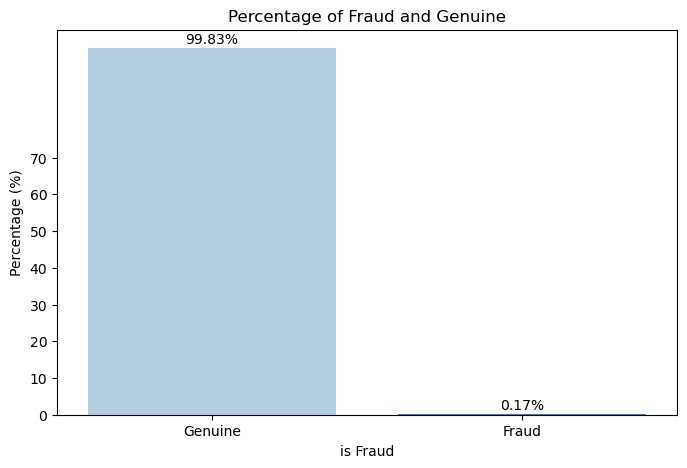

In [8]:
# Calculating the percentage of each class
percentage = df['Class'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette='Blues')
plt.title('Percentage of Fraud and Genuine')
plt.xlabel('is Fraud')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Genuine','Fraud'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

We can see that class variable is highly imbalanced as we already know

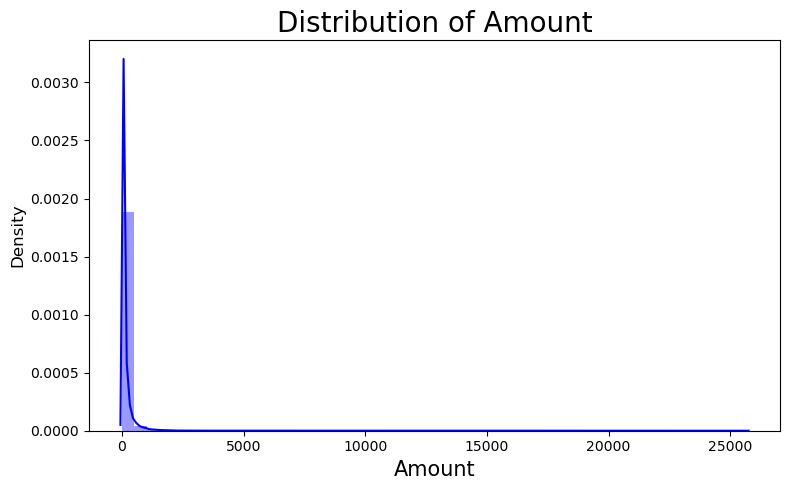

In [9]:
plt.figure(figsize=(8, 5))
sns.distplot(df["Amount"], kde=True, color='blue')
plt.xlabel("Amount", fontsize=15)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of Amount', fontsize=20)
plt.tight_layout()
plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

The amount variable is mostly dense around the samllar amount regions.

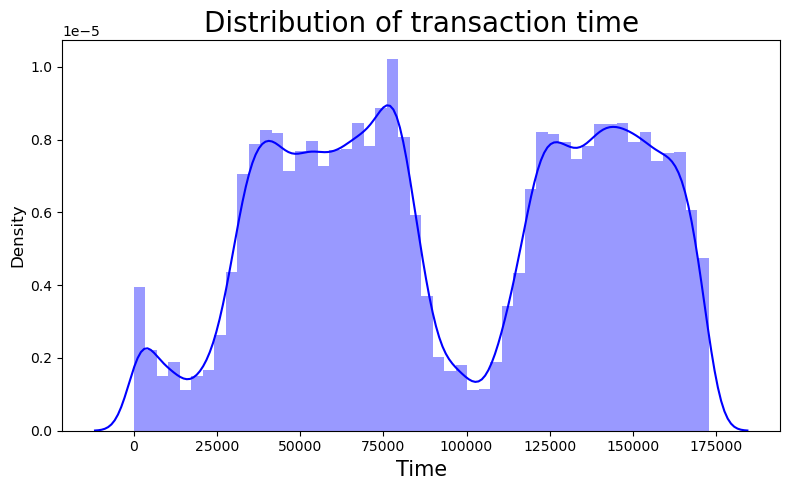

In [10]:
plt.figure(figsize=(8, 5))
sns.distplot(df["Time"], kde=True, color='blue')
plt.xlabel("Time", fontsize=15)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of transaction time', fontsize=20)
plt.tight_layout()
plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

Time feature follows **bimodal distribution** i.e. the peak rises and falls down and rises again. The fall might happen due to night time.

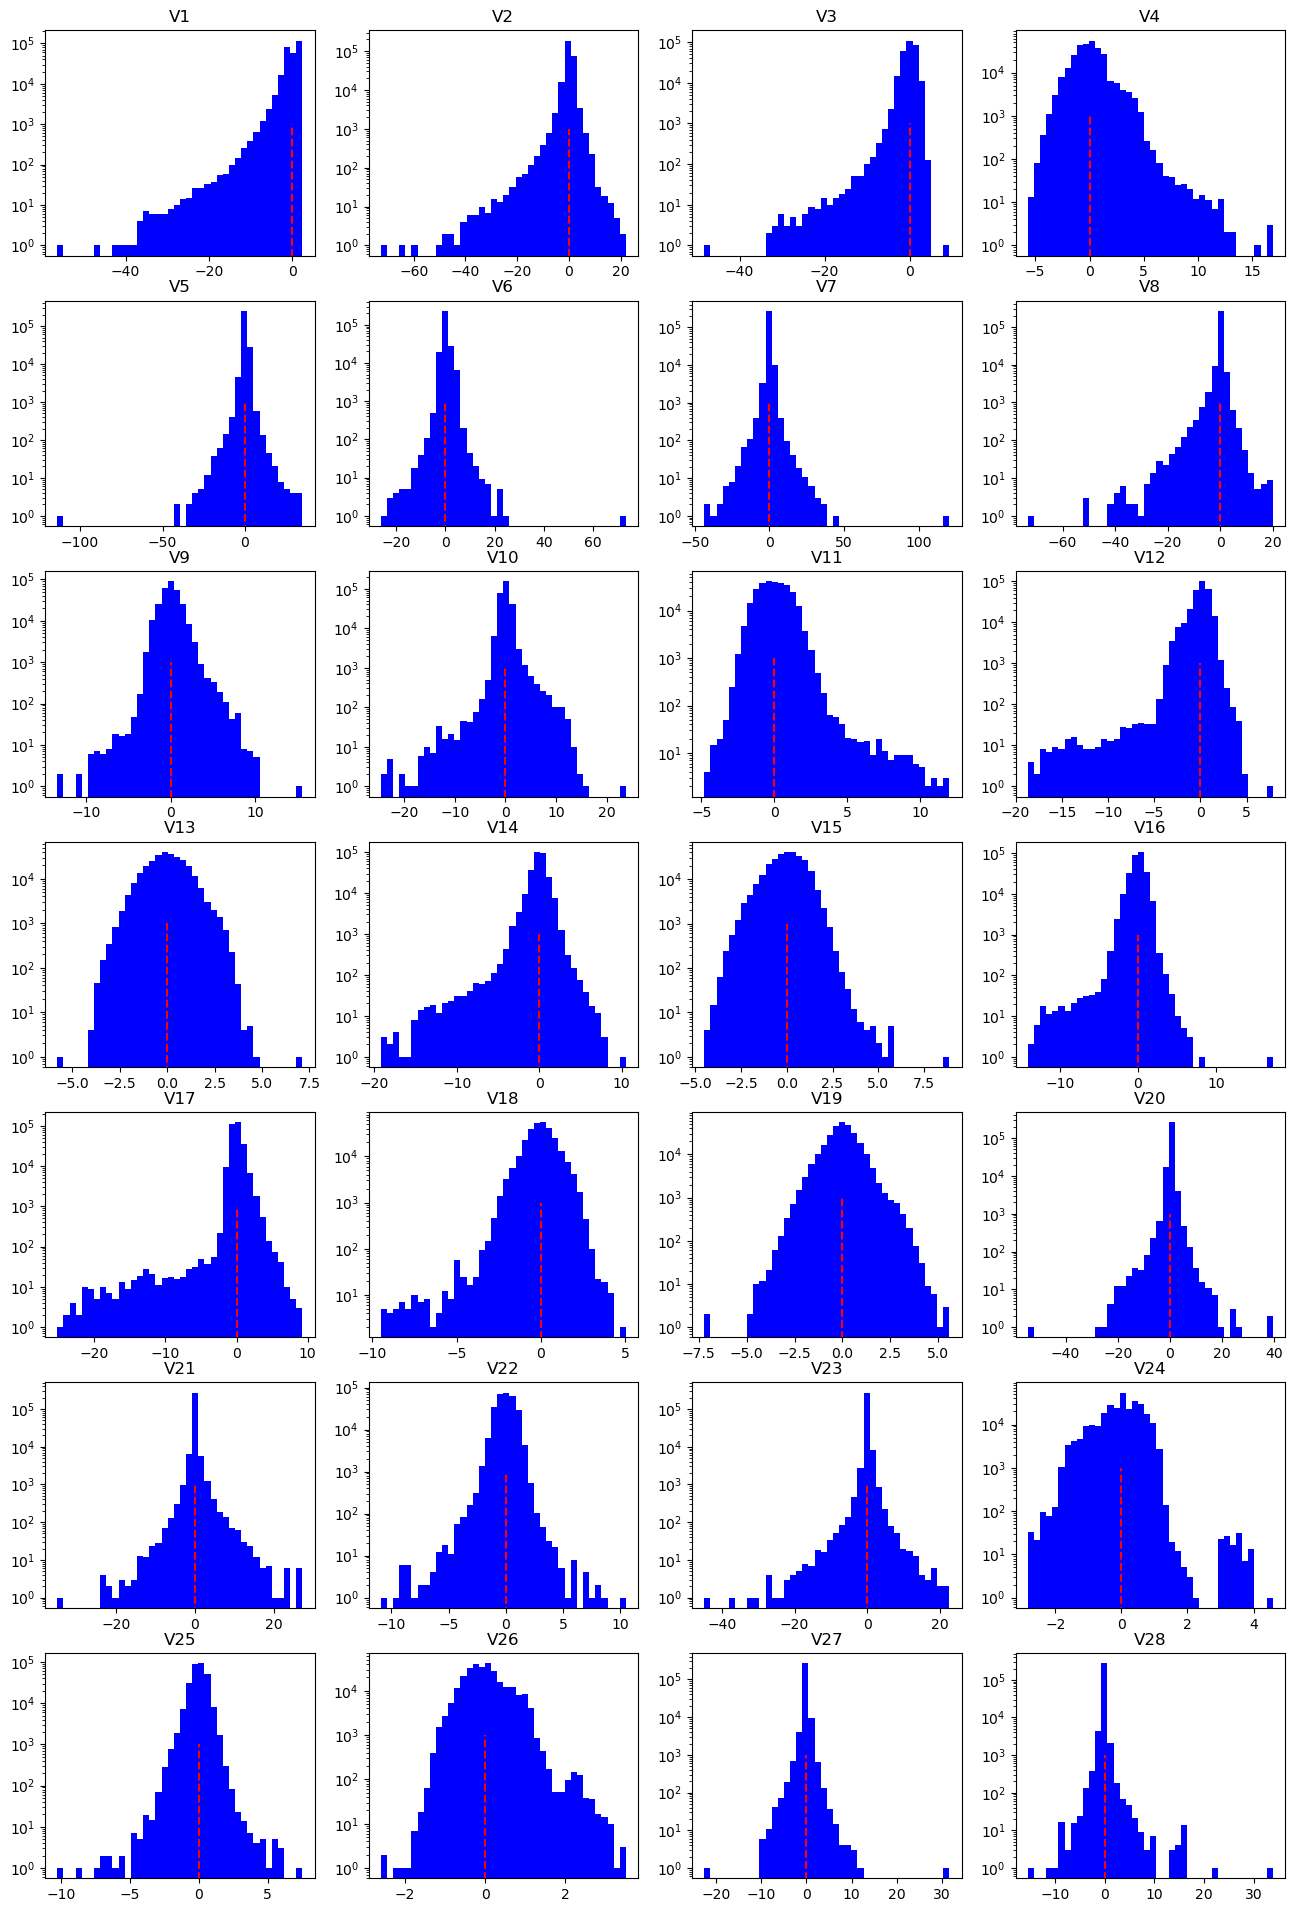

In [19]:
#distribution of the different features

fig, ax = plt.subplots(nrows=7,ncols=4,figsize=(16,24))

for i in range(1,29):
  m = (i-1)//4
  n = (i-1)%4
  col = 'V' + str(i)
  ax[m,n].hist(df[col],bins=40, color='b')
  ax[m,n].set_title(col)
  ax[m,n].vlines(x=df[col].mean(),ymin=0,ymax=10**3,linestyle='dashed',colors='r')
  ax[m,n].set_yscale('log')

## 4.2: Bivariate Analysis
<a id="4.2"></a>
 ⬆️[Table Contents](#table_content)

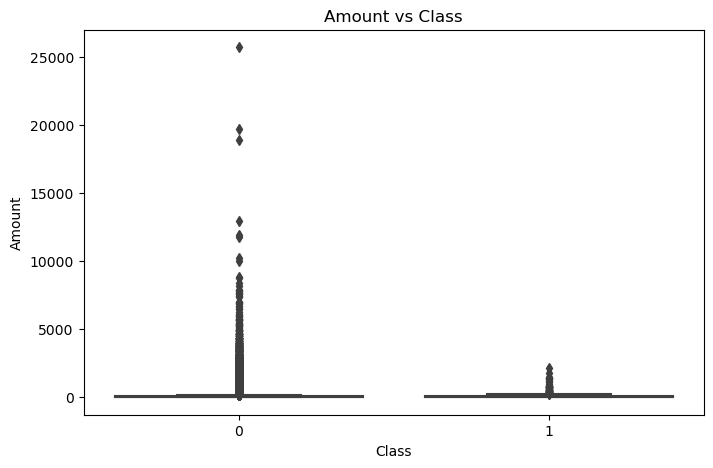

In [11]:
#Class vs Amount

plt.figure(figsize=(8, 5))
sns.boxplot(x='Class',y='Amount',data=df)
plt.title('Amount vs Class')
plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
It can be clearly observed that there are very less data points having amount greater than 10,000(all in the non-fraudulent category).

In [12]:
#checking the above observation
df[df['Amount']>10000]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,-5.533256,1.446695,0.902675,1.746979,2.354131,0.801598,2.068475,1.413407,0.748320,-3.637371,26.237391,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
54018,46253.0,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,-5.545590,1.067549,0.832726,1.592166,2.788521,2.569520,2.721505,-0.613875,3.490798,-3.838863,24.133894,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,-8.423404,1.186360,1.879982,3.496723,4.082503,1.406178,0.773133,0.902964,5.041069,-7.213527,39.420904,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0
151296,95286.0,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,-8.908182,-0.083514,-2.281866,3.739366,5.989210,2.582162,3.032874,0.530779,4.712398,-6.938297,38.117209,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0
169457,119713.0,-20.924897,-37.943452,-14.060281,10.473005,-10.866639,6.256654,14.960521,-2.392155,-0.597076,-5.341249,0.713033,1.361297,1.410760,2.969936,1.441114,1.134212,0.297532,1.340820,-4.392421,23.649095,6.829810,-6.926353,-9.928657,-0.447084,-4.848151,-2.241620,-2.140723,2.001492,11789.84,0
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,-12.005487,6.853897,-9.189418,7.126883,-6.795942,8.877742,17.315112,-7.173805,-1.968044,5.501747,-54.497720,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0
284249,172273.0,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,-7.776435,0.214173,-4.499851,0.241005,0.537895,2.901938,2.326099,-0.402142,1.257379,2.008145,2.454553,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0


<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

we have only 7 transaction which have amount > 10000 and they all are non-fraudulent transaction.

In [13]:
# excluding the above mentioned points
df = df[df['Amount']<10000]
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000
mean,94813.586235,0.000716,0.001123,0.000542,-0.000326,0.000800,-0.000436,-0.000897,0.000198,0.000045,0.000196,-0.000043,0.000028,-0.000071,-0.000056,-0.000083,-0.000105,0.000014,-0.000053,0.000080,-0.000419,-0.000100,0.000140,0.000326,-0.000027,0.000103,0.000019,-0.000073,0.000008,87.927043,0.001728
std,47488.019368,1.953489,1.635632,1.511555,1.414375,1.359939,1.324170,1.210706,1.193066,1.098578,1.088140,1.020636,0.998993,0.995138,0.958356,0.915110,0.875607,0.849232,0.838046,0.813619,0.752023,0.732325,0.724703,0.618721,0.605586,0.520394,0.482084,0.399034,0.328549,235.414278,0.041528
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-4.932733,-28.009635,-34.830382,-8.887017,-44.807735,-2.836627,-10.295397,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,54202.500000,-0.920290,-0.598457,-0.890240,-0.848660,-0.691546,-0.768299,-0.554089,-0.208605,-0.643083,-0.535402,-0.762503,-0.405566,-0.648553,-0.425594,-0.582892,-0.468069,-0.483748,-0.498850,-0.456268,-0.211725,-0.228395,-0.542320,-0.161841,-0.354593,-0.317128,-0.326979,-0.070835,-0.052960,5.590000,0.000000
50%,84691.000000,0.018158,0.065524,0.179859,-0.019921,-0.054322,-0.274227,0.040079,0.022363,-0.051416,-0.092884,-0.032767,0.140025,-0.013586,0.050568,0.048037,0.066370,-0.065678,-0.003659,0.003741,-0.062486,-0.029452,0.006795,-0.011191,0.040964,0.016607,-0.052124,0.001343,0.011243,22.000000,0.000000
75%,139320.000000,1.315648,0.803743,1.027212,0.743302,0.611927,0.398463,0.570385,0.327356,0.597164,0.454005,0.739561,0.618202,0.662438,0.493112,0.648780,0.523268,0.399655,0.500757,0.458949,0.133017,0.186367,0.528554,0.147642,0.439524,0.350716,0.240952,0.091045,0.078277,77.150000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.491217,34.801666,22.529298,36.877368,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.825654,8.289890,9.253526,4.295648,5.591971,23.643417,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,8790.260000,1.000000


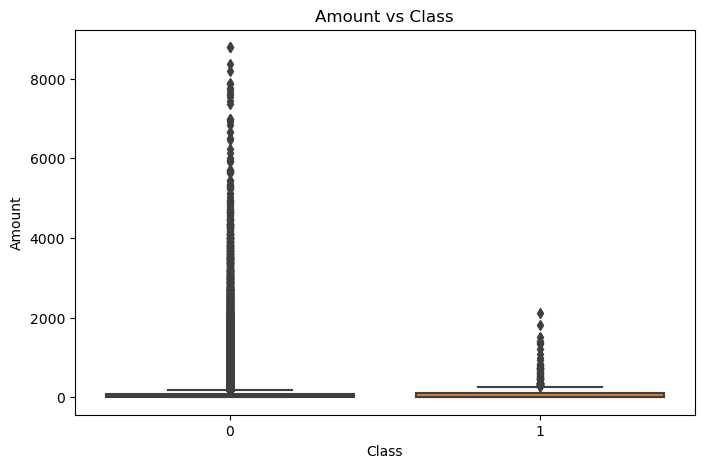

In [14]:
# Amount Vs Class

plt.figure(figsize=(8, 5))
sns.boxplot(x='Class',y='Amount',data=df)
plt.title('Amount vs Class')
plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

Let's add "Time_min"(minute) and "Time_hour"(hour) column to our data to see if we can get some more insigths.

In [15]:
#Amount vs time distribution

data_new = df
timedelta = pd.to_timedelta(data_new['Time'],unit='s')

data_new['Time_min'] = (timedelta.dt.components.minutes).astype(int)
data_new['Time_hour'] = (timedelta.dt.components.hours).astype(int)

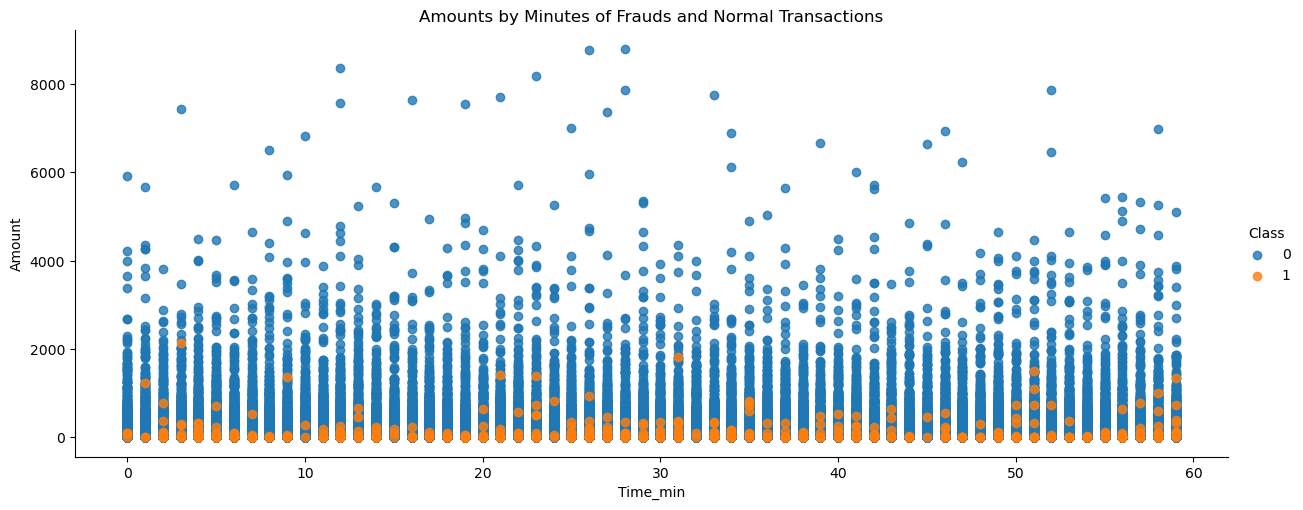

In [16]:
ax = sns.lmplot(y='Amount',x='Time_min',fit_reg=False,aspect=2.5,data=data_new,hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=12)
plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

So as we can see transactions both fraud and legitimate are more or less uniformly distributed throughout Time_min.

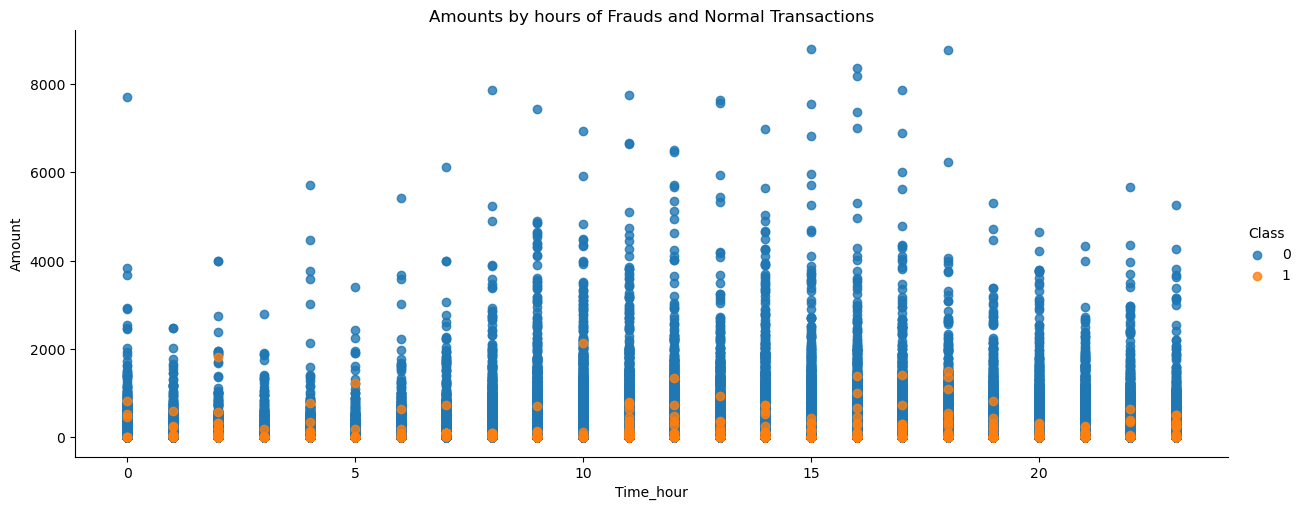

In [17]:
ax = sns.lmplot(y='Amount',x='Time_hour',fit_reg=False,aspect=2.5,data=data_new,hue='Class')
plt.title("Amounts by hours of Frauds and Normal Transactions",fontsize=12)
plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

Now transactions show a more non uniform disribution accross Time_hour which makes sense but still we can not see any particular pattern to distinguish fraud and non-fraud from this analysis, non-fraud volume is more on active hour compared to lean hours.

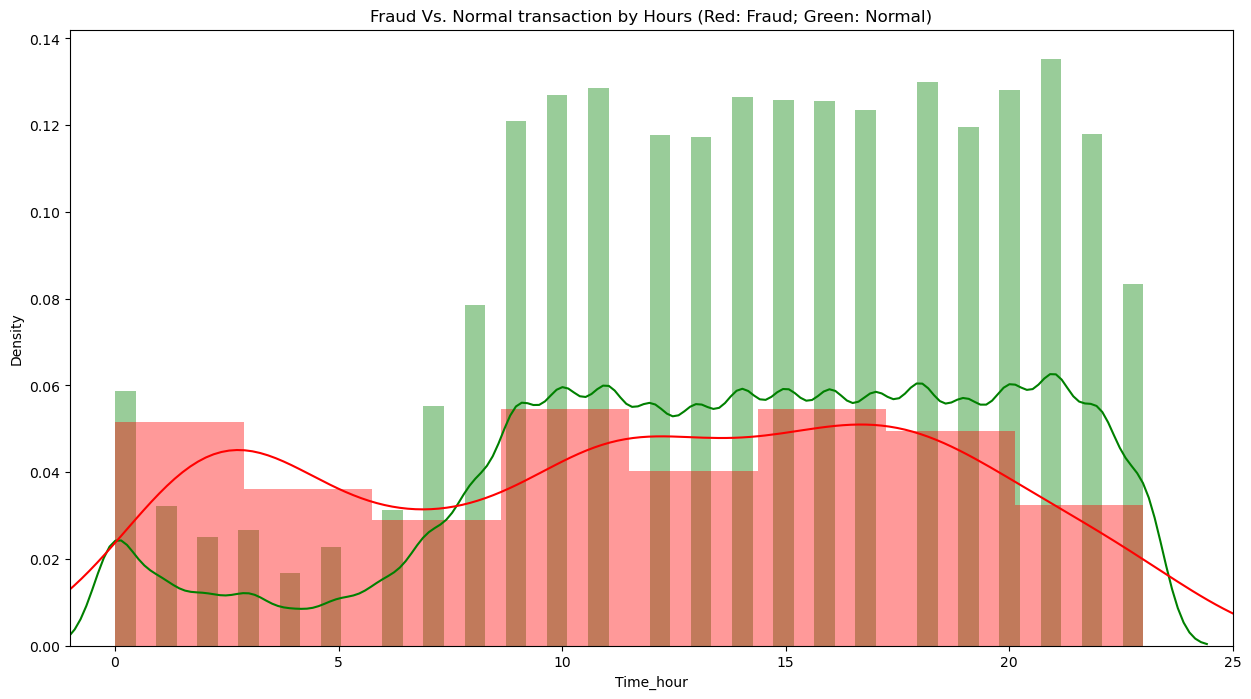

In [18]:
plt.figure(figsize=(15,8))
sns.distplot(data_new[data_new['Class']==0]['Time_hour'],color='g')
sns.distplot(data_new[data_new['Class']==1]['Time_hour'],color='r')
plt.title('Fraud Vs. Normal transaction by Hours (Red: Fraud; Green: Normal)',fontsize=12)
plt.xlim([-1,25])
plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
This confirms the pattern oberserved above about non-fraud and also shows that fraud transactions are much more uniform accorss the day.

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

***CONCLUSIONS FROM EDA***
1. The data consisted of around 2,85,000 data points, 30 features including time and amount, and the labeled class of whether a transaction is actually fraud or not.
2. There were no null values present in the original dataset but the data was highly unbalanced with 99.83% of the data points being non-fraudulent transactions.
3. The time feature had a bimodal distribution i.e. peaks falling and rising. We can concluded that the peaks might fall due to lesser transactions during nighttime.
4. Very small proportion of transactions had amounts > 10,000 hence they were eliminated from the dataset.
5. Most of the fraudulent transactions were of small amounts (<1000 units - since we don’t know about the units about the currency).
6. The occurrence of fraudulent transactions was independent of the time of the day.

# <p id="2" style="justify-content: center; align-items: center; background-color: #C6E48B; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">5: Data Preprocessing</p>
<a id="5"></a>
 ⬆️[Table Contents](#table_content)

# 5.1: Scaling -- Standardization and Robust Scalar
<a id="5.1"></a>
 ⬆️[Table Contents](#table_content)

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

Since fraud transactions which are also low in number have relatively smaller value(amount) so we need to have our data scaled, We are going to use robust scalar to scale our data.

In [15]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

df.drop(['Time','Amount'],axis=1,inplace=True)

In [16]:
df.drop(['Time_min','Time_hour'],axis=1,inplace=True)

In [17]:
#inserting these scaled columns at 0,1
scaled_amount = df['scaled_amount']

df.drop(['scaled_amount'],axis=1,inplace=True)
df.insert(0,'scaled_amount',scaled_amount)

df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783399,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269843,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.984069,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418390,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670626,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


# 5.2: Splitting Dataset
<a id="5.2"></a>
 ⬆️[Table Contents](#table_content)

Splitting data is the first step to model training and here we are using *StratifiedKFold*, it maintains the class distribution in training and test data which is much needed in imbalanced distribution like ours.

In [18]:
from sklearn.model_selection import StratifiedKFold

X = df.drop('Class',axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5,random_state=None,shuffle=False)

for train_index, test_index in sss.split(X,y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

#converting it into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

#check if both train and test distributions are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest,return_counts=True)

print("Label dstributions: \n")
print(train_counts_label/len(original_ytrain))
print(test_counts_label/len(original_ytest))

Train: [ 30442  30473  30496 ... 284796 284797 284798] Test: [    0     1     2 ... 57016 57017 57018]
Train: [     0      1      2 ... 284796 284797 284798] Test: [ 30442  30473  30496 ... 113962 113963 113964]
Train: [     0      1      2 ... 284796 284797 284798] Test: [ 80757  81183  81606 ... 170942 170943 170944]
Train: [     0      1      2 ... 284796 284797 284798] Test: [150644 150651 150657 ... 227860 227861 227862]
Train: [     0      1      2 ... 227860 227861 227862] Test: [212511 212639 213087 ... 284796 284797 284798]
Label dstributions: 

[0.99827072 0.00172928]
[0.99827946 0.00172054]


# 5.3: Handling Unbalanced Dataset
<a id="5.3"></a>
 ⬆️[Table Contents](#table_content)

Since our classes are highly unbalanced, we have to make them equivalent in occurence to have a normal distribution of the classes, shuffle the data before creating the sub-samples.

In [19]:
df = df.sample(frac=1)

fraud_df = df.loc[df['Class']==1]
non_fraud_df = df.loc[df['Class']==0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1,random_state=42)

new_df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
81684,-0.167691,1.265738,-0.560020,0.162779,-1.276214,-0.171347,0.975370,-0.827018,0.367341,1.731729,-0.942514,-0.125155,0.845994,0.050532,-0.032297,0.975403,-0.044272,-0.746974,0.979014,1.051956,-0.079093,0.106530,0.568505,-0.334713,-1.676590,0.744494,-0.411759,0.102841,0.002961,0
106679,2.868921,-0.440095,1.137239,-3.227080,3.242293,-2.033998,-1.618415,-3.028013,0.764555,-1.801937,-4.711769,4.663255,-5.171735,-1.624070,-6.713878,0.607986,-3.275207,-6.823831,-1.355309,0.291251,0.895841,0.764187,-0.275578,-0.343572,0.233085,0.606434,-0.315433,0.768291,0.459623,1
193773,2.487423,-1.956324,1.089627,-2.026201,1.077582,-0.273602,-0.517162,1.191911,0.710493,-1.740012,-0.468630,0.183535,0.971684,0.488156,1.794382,-0.382198,-0.110257,-0.069324,0.549927,0.996092,-0.516109,0.375612,0.854339,-0.158323,-0.275952,-0.183556,-0.446178,-0.182073,-0.307899,0
150678,0.116126,-13.086519,7.352148,-18.256576,10.648505,-11.731476,-3.659167,-14.873658,8.810473,-5.418204,-13.202577,6.357227,-15.531611,0.659695,-11.412330,-2.447576,-9.833743,-18.174617,-7.269905,0.623797,-1.376298,2.761157,-0.266162,-0.412861,0.519952,-0.743909,-0.167808,-2.498300,-0.711066,1
47802,0.922303,-3.365319,2.426503,-3.752227,0.276017,-2.305870,-1.961578,-3.029283,-1.674462,0.183961,-4.980928,3.657882,-6.409822,-1.087310,-8.509433,1.432572,-5.369890,-9.069079,-2.819807,0.874543,-0.036837,2.070008,-0.512626,-0.248502,0.126550,0.104166,-1.055997,-1.200165,-1.012066,1


In [20]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


# 5.4: Outlier Treatment
<a id="5.4"></a>
 ⬆️[Table Contents](#table_content)

### CORRELATION HEAT MAP
*Correlation* is a term used to represent the statistical measure of linear relationship between two variables. It can also be defined as the measure of dependence between two different variables if there are multiple variables and the goal is to find correlation between all of these variables and store them using appropriate data structure, the matrix data structure is used. Such matrix is called as correlation matrix.


<!-- Dependence between two variables, also termed as correlation, can be measured using the following:

* **Correlation coefficient / Pearson correlation coefficient** which measures how the value of two different variables vary with respect to each other. The formula given below represents Pearson correlation coefficient.
* Rank correlation coefficient metric such as **Spearman correlation** coefficient is used to measure the extent to which one variable increases / decreases as the other variable increases / decreases.
Pearson correlation coefficient between two variables X and Y can be calculated using the following formula. X bar is mean value of X and Y bar is mean value of Y. 𝑋𝑖 and 𝑌𝑖 represents different values of X and Y.

[read more about correlation](https://vitalflux.com/correlation-heatmap-with-seaborn-pandas/) -->


Text(0.5, 1.0, 'SubSample Correlation Matrix \n (use for reference)')

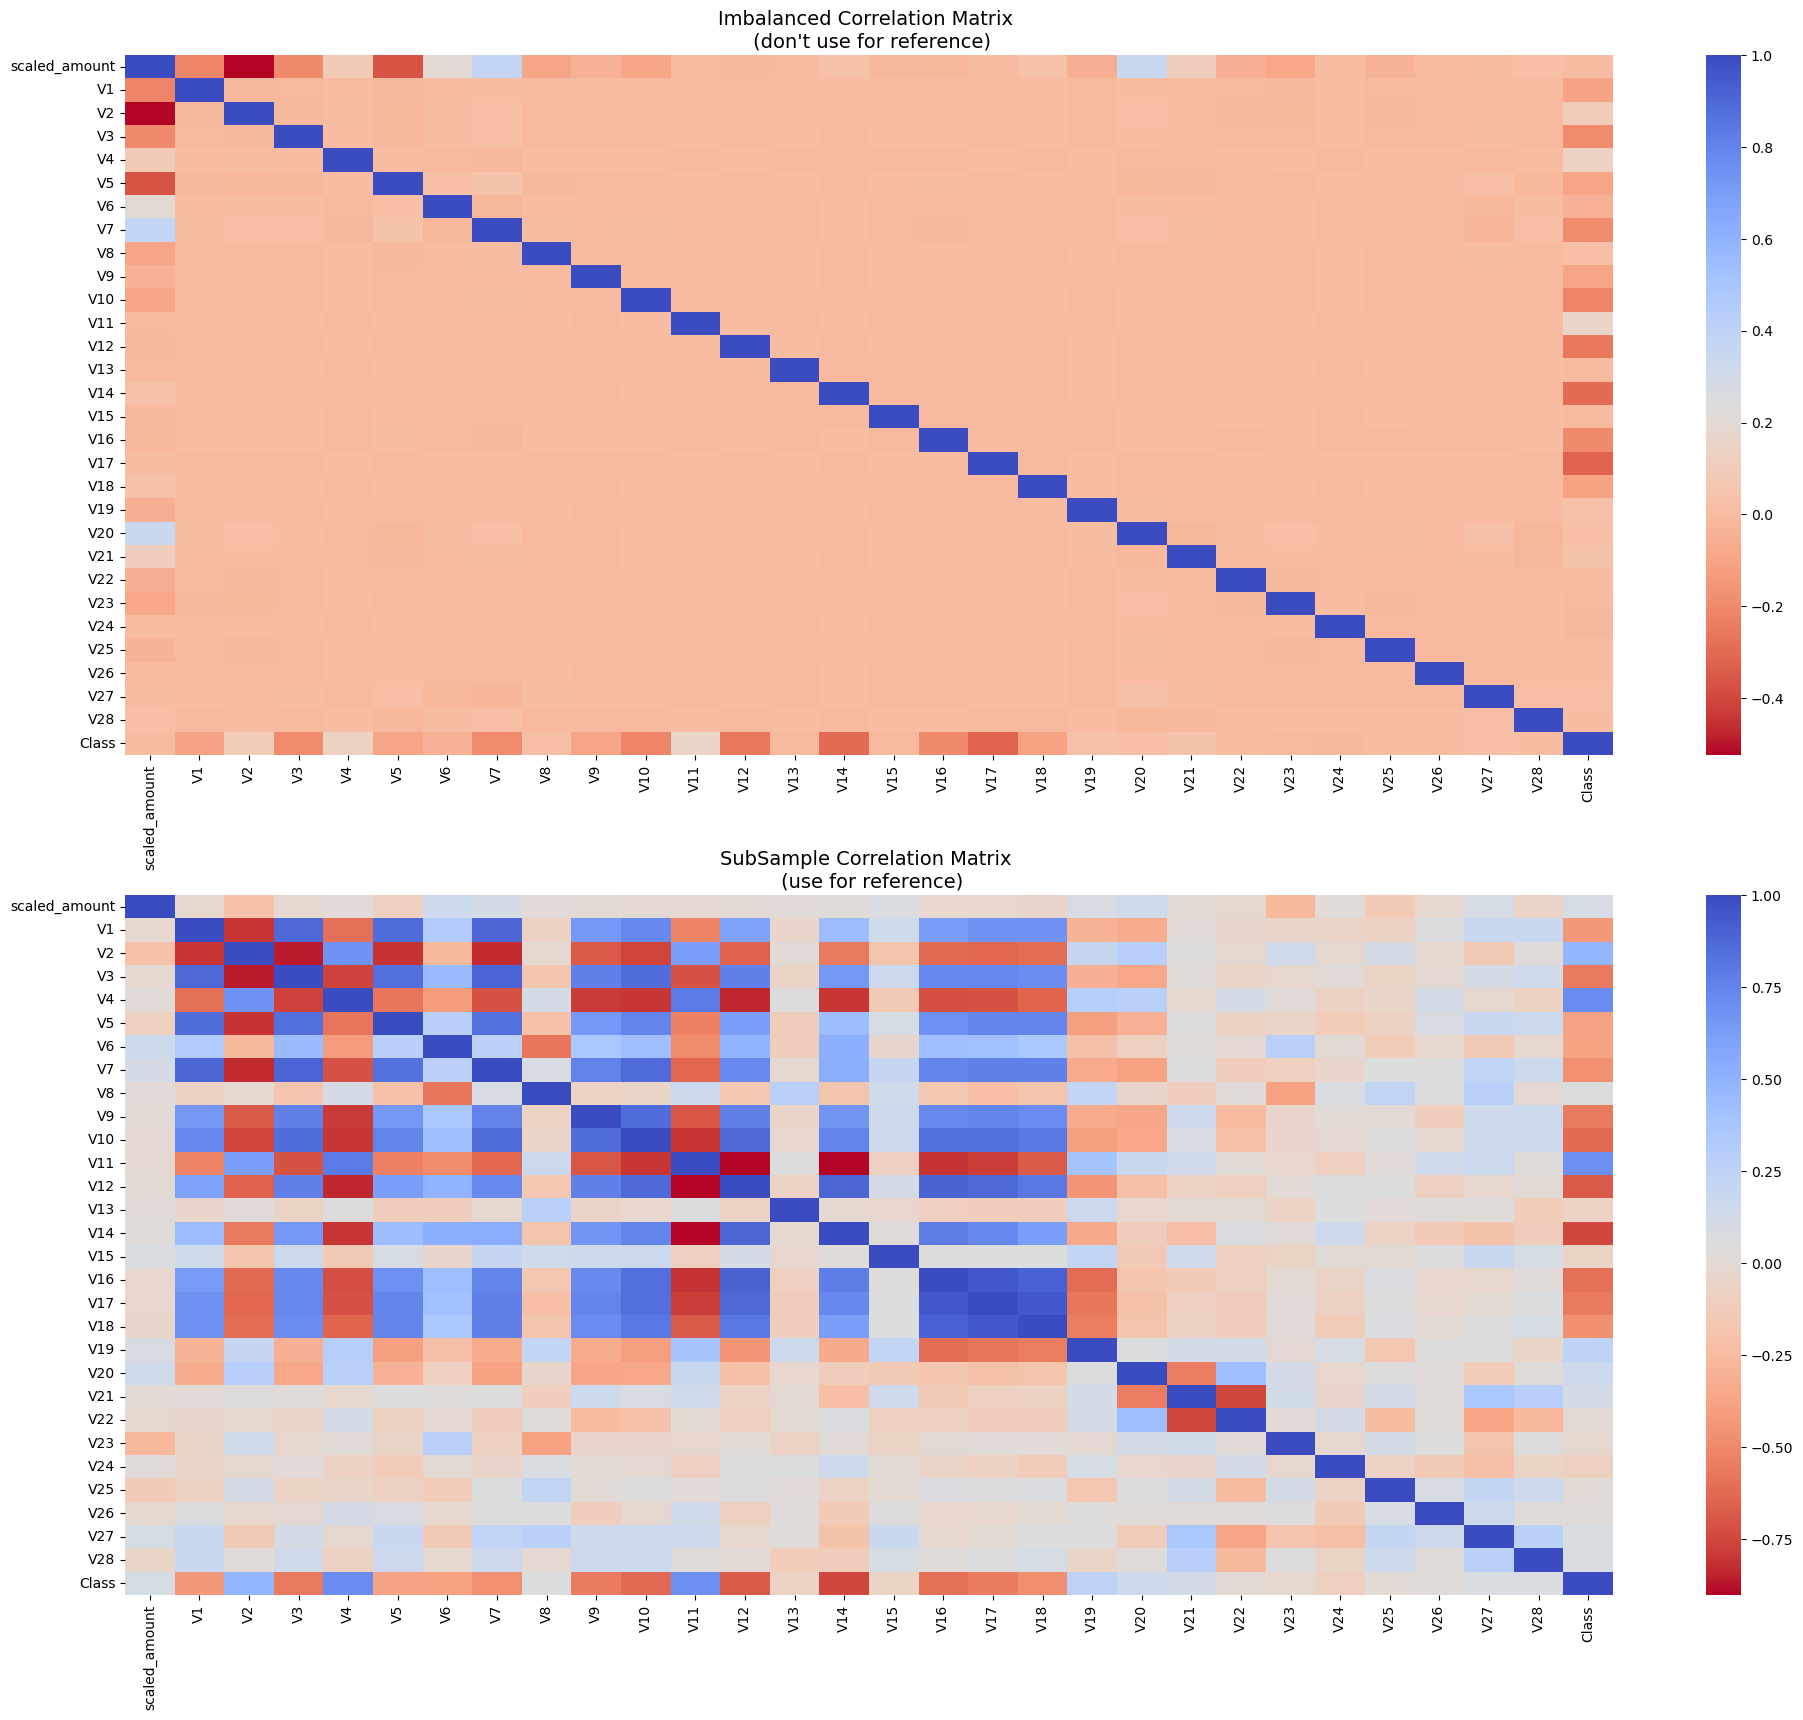

In [21]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# comparing correlation between dataset
# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

# new_df
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

We look at the correlation matrix in original distribution and later used balanced data it shows no much correlation between features or classes for orginal distribution but on balanced set we can visualize correlation more easily, so we find out features highly correlated(positively/negatively) and do outlier detection and removal from them for our data preperation.


Syntax to calculate and see features below or above certain threshold
```
corr = new_df.corr()
corr[['Class']]
corr[corr.Class<-0.6]['Class']
```


## 5.4.1: Detecting Outliers
<a id="5.4.1"></a>
 ⬆️[Table Contents](#table_content)

In [22]:
corr = new_df.corr()
corr[['Class']]
corr[corr.Class<-0.6]['Class']

V10   -0.628609
V12   -0.685104
V14   -0.747888
V16   -0.601369
Name: Class, dtype: float64

In [23]:
corr = new_df.corr()
corr[['Class']]
corr[corr.Class>0.5]['Class']

V4       0.714065
V11      0.697114
Class    1.000000
Name: Class, dtype: float64

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

V4, V11 are our highly positively correlated featres and V10, V12, V14 have high negative correlation with **class**, now we do outlier analysis and removal.

-Negative correlations with our class (the lower the feature value, higher the chances of it being a fraud transaction)

we use seaborn boxplot for our visualization,

```
f, axes = plt.subplots(ncols=4,figsize=(20,4))

sns.boxplot(x='Class',y='V16',data=new_df,ax=axes[0])
axes[0].set_title('V16 vs Class Negative Correlation')
```


Text(0.5, 1.0, 'V10 vs Class Negative Correlation')

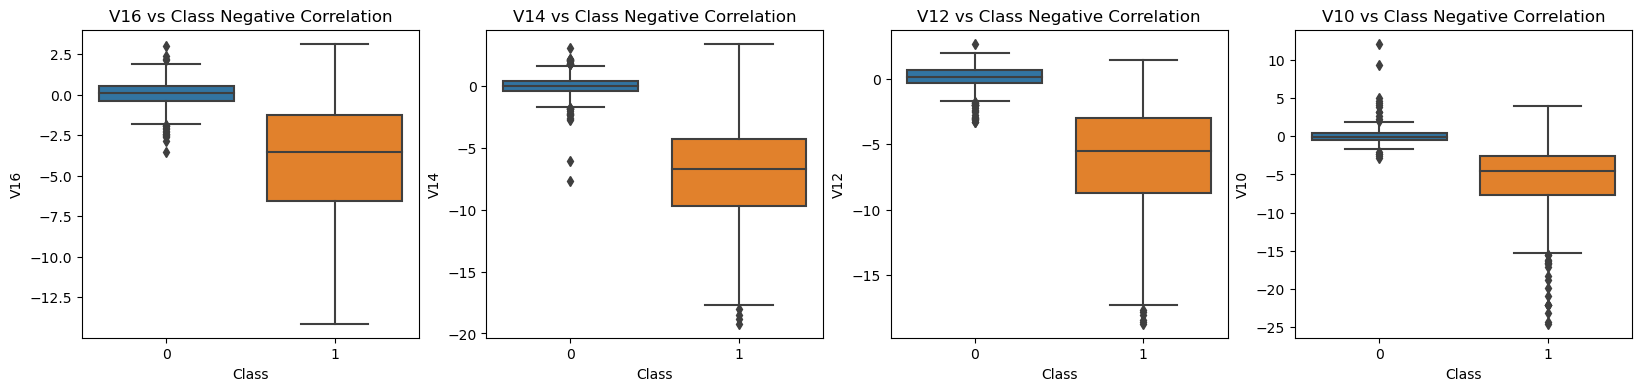

In [24]:
f, axes = plt.subplots(ncols=4,figsize=(20,4))

#Negative correlations with our class (the lower the feature value, higher the chances of it being a fraud transaction)
sns.boxplot(x='Class',y='V16',data=new_df,ax=axes[0])
axes[0].set_title('V16 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V14',data=new_df,ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V12',data=new_df,ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V10',data=new_df,ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

Text(0.5, 1.0, 'V4 vs Class Positive Correlation')

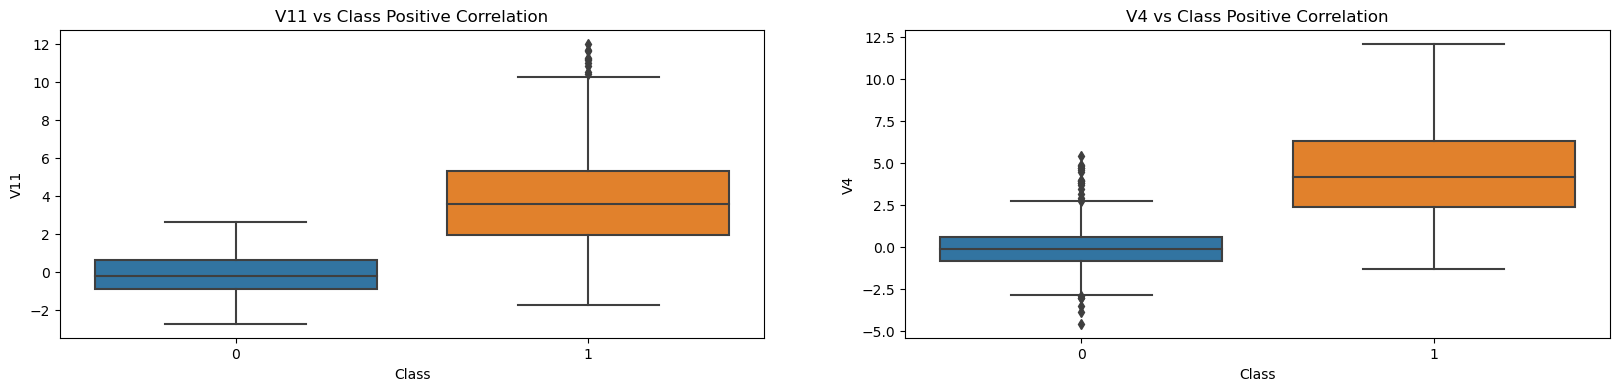

In [25]:
f, axes = plt.subplots(ncols=2,figsize=(20,4))

#Positive correlations (the higher the feature the probability of a fraud transaction increases)
sns.boxplot(x='Class',y='V11',data=new_df, ax = axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x='Class',y='V4',data=new_df, ax = axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

Text(0.5, 1.0, 'V10 Distribution \n (Fraud Transactions)')

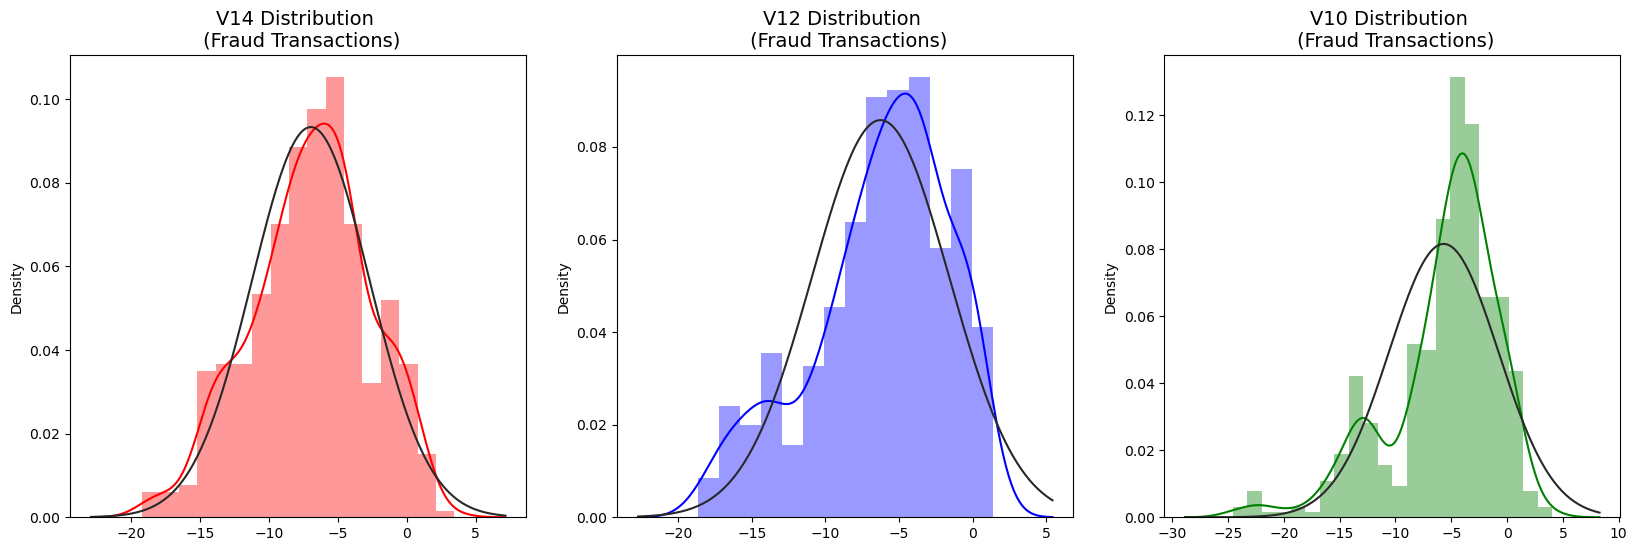

In [26]:
from scipy.stats import norm

f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class']==1].values
sns.distplot(v14_fraud_dist, ax=ax1,fit=norm, color='red')
ax1.set_title('V14 Distribution \n (Fraud Transactions)',fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class']==1].values
sns.distplot(v12_fraud_dist, ax=ax2,fit=norm, color='blue')
ax2.set_title('V12 Distribution \n (Fraud Transactions)',fontsize=14)

v10_fraud_dist = new_df['V10'].loc[new_df['Class']==1].values
sns.distplot(v10_fraud_dist, ax=ax3,fit=norm, color='green')
ax3.set_title('V10 Distribution \n (Fraud Transactions)',fontsize=14)

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    
## 5.4.2: Removing Outliers
<a id="5.4.2"></a>
 ⬆️[Table Contents](#table_content)

We will use interquatile range to remove outliers from highly correlated features

IQR is used to measure variability by dividing a data set into quartiles. The data is sorted in ascending order and splited into 4 equal parts. Q1, Q2, Q3 called first, second and third quartiles which divide the data into 4 equal parts.

* Q1 represents the 25th percentile of the data.
* Q2 represents the 50th percentile of the data.
* Q3 represents the 75th percentile of the data.

IQR is the range between the first and the third quartiles namely Q1 and Q3: IQR = Q3 – Q1. The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

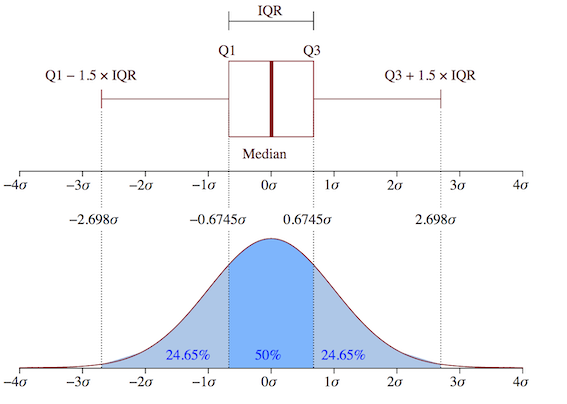

In [27]:
#Complete Line 2-16
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 =np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr =q75 - q25
print('iqr: {}'.format(v14_iqr))
v14_cut_off =v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))
new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

###################################################################################################################

v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25
v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)

##################################################################################################################

v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25
v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.69272296475 | Quartile 75: -4.2828208495
iqr: 5.40990211525
Cut Off: 8.114853172875002
V14 Lower: -17.807576137625002
V14 Upper: 3.8320323233750013
Feature V14 Outliers for Fraud Cases: 4
V14 outliers:[-19.21432549, -18.82208674, -18.04999769, -18.49377336]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.343037158875
V12 Upper: 5.776973386125
V12 outliers: [-18.43113103, -18.68371463, -18.55369701, -18.04759657]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.898854632625
V10 Upper: 4.920334958374999
V10 outliers: [-24.40318497, -16.74604411, -15.34609885, -15.23996196, -15.12416281, -14.92465477, -15

Text(0, -12, 'Fewer extreme \n outliers')

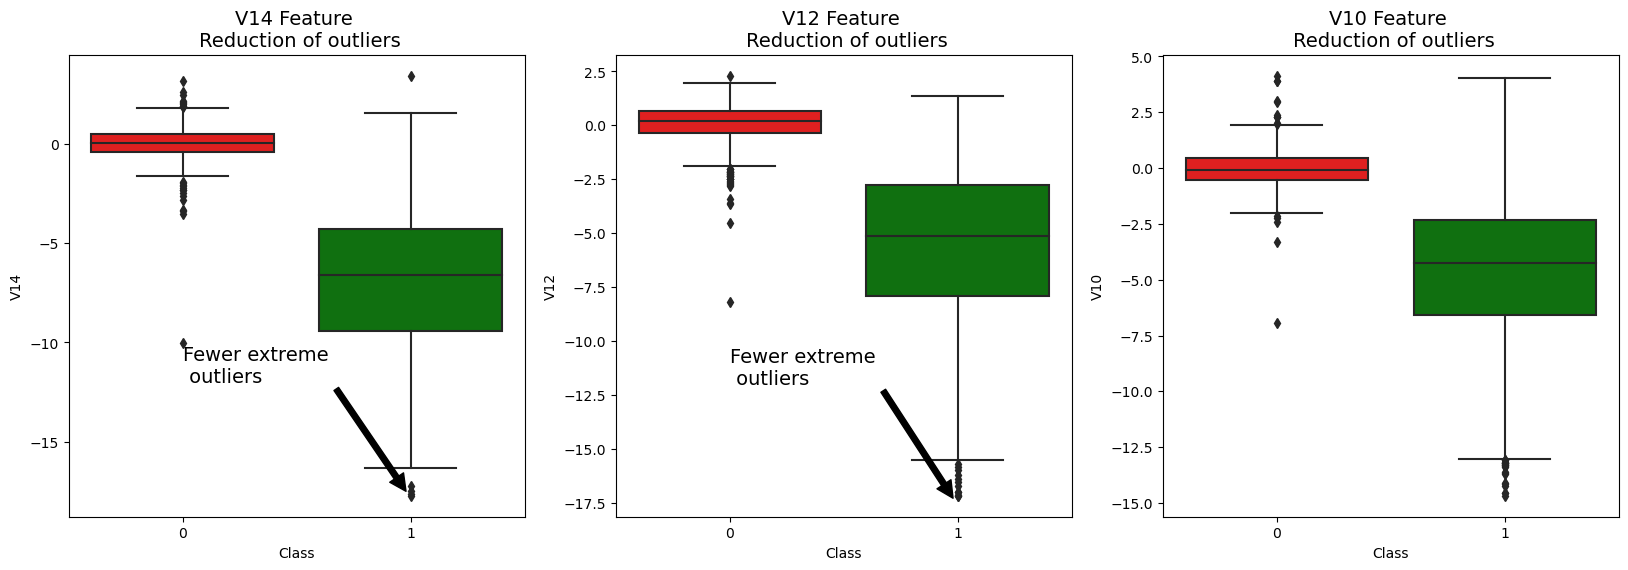

In [23]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,6))

colors = ['red','green']

#feature V14
sns.boxplot(x='Class',y='V14',data=new_df,ax=ax1,palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),arrowprops=dict(facecolor='black'),fontsize=14)

#feature v12
sns.boxplot(x='Class',y='V12',data=new_df,ax=ax2,palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),arrowprops=dict(facecolor='black'),fontsize=14)

#feature V10
sns.boxplot(x='Class',y='V10',data=new_df,ax=ax3,palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),arrowprops=dict(facecolor='black'),fontsize=14)


# 5.5: Dimensionality Reduction visualization
<a id="5.5"></a>
 ⬆️[Table Contents](#table_content)

We have a data that is high dimensional and visualising any patterns in higher than 3 is not possible so to see how our data would look like we are going to use dimensionality reduction techniques for visualisation of our data, we are going to use.
* [TSNE](https://scikit-learn.org/stable/modules/manifold.html#t-distributed-stochastic-neighbor-embedding-t-sne)
* [Principal Component Analysis(PCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

<!-- * [TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)

To read more about the techniques and the concept behind dimensionality reduction follow the links:
* [PCA vs t-SNE](https://towardsdatascience.com/pca-vs-tsne-el-cl%C3%A1sico-9948181a5f87)
* [Dimensionality Reduction for Data Visualization: PCA vs TSNE vs UMAP vs LDA](https://towardsdatascience.com/dimensionality-reduction-for-data-visualization-pca-vs-tsne-vs-umap-be4aa7b1cb29)

To havee a brief account of comparision of the three follow this [link](https://datascience.stackexchange.com/questions/66198/comparison-of-t-sne-and-pca-and-truncate-svd) -->

Look at the given example and follow links given to complete the cell below

```
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

n_components(int): Dimension of the embedded spac, default=2.
```

**Note explanation of argument *n_components* is different for all the three so go through documentaion before attempting this section.**

In [28]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

X = new_df.drop('Class',axis=1)
y = new_df['Class']

#TSNE implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)                      #### Complete this line ####
t1 = time.time()
print("T-SNE took {:.2} s".format(t1-t0))

#PCA implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)                       #### Complete this line ####
t1 = time.time()
print("PCA took {:.2} s".format(t1-t0))

#TruncatedSVD implementation
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, random_state=42).fit_transform(X.values)                       #### Complete this line ####
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1-t0))

T-SNE took 7.6 s
PCA took 0.063 s
Truncated SVD took 0.015 s


As we plot reduced dimension features we can see there is a decison boundary for model to learn visible in the 2-D projections.

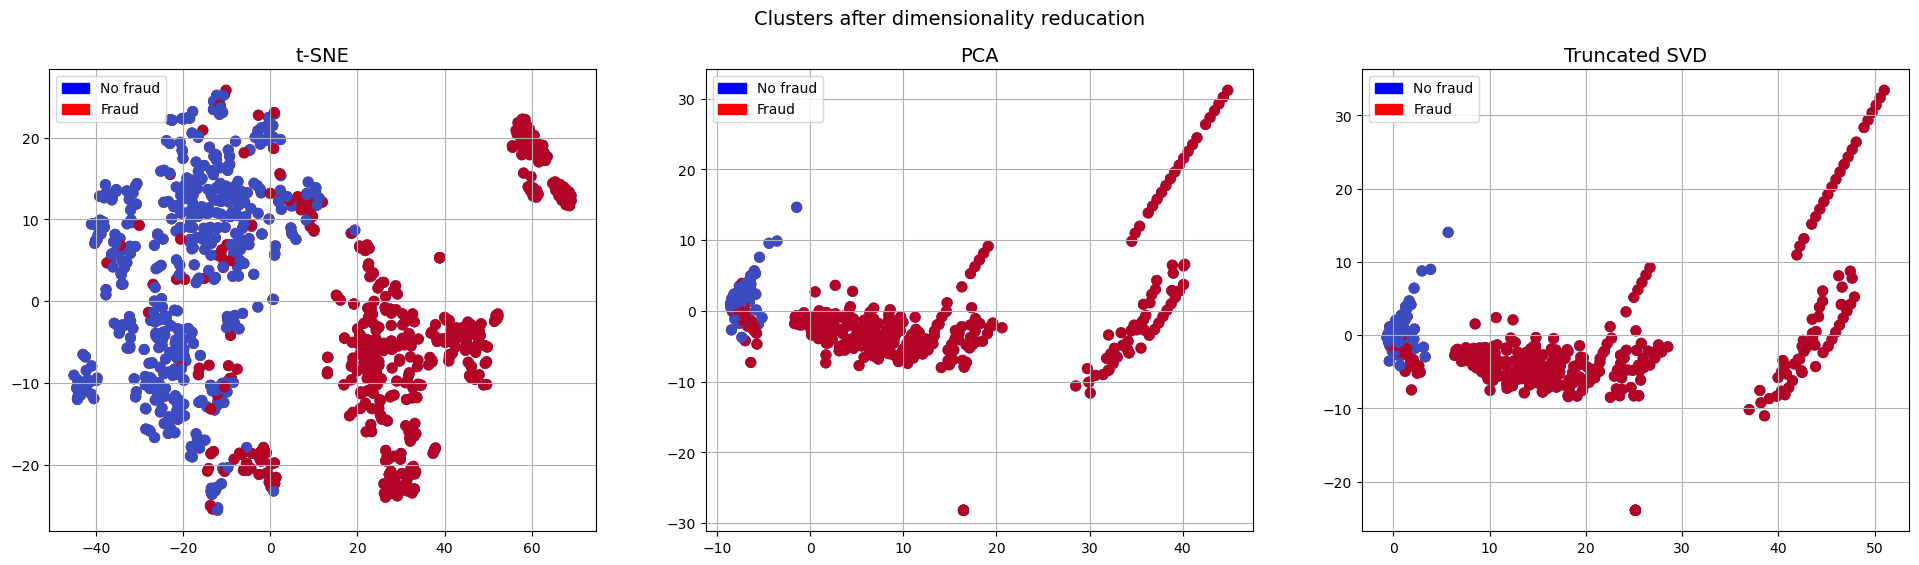

In [29]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(24,6))
f.suptitle('Clusters after dimensionality reducation',fontsize=14)

blue_patch = mpatches.Patch(color='blue',label = 'No fraud')
red_patch = mpatches.Patch(color='red',label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

# 6: Implimenting Models
<a id="6"></a>
 ⬆️[Table Contents](#table_content)


## 6.1: Spliting in train test
<a id="6.1"></a>
 ⬆️[Table Contents](#table_content)

In [30]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# SPLITTING IN TRAIN AND TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#converting to array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [32]:
print('X_shapes:\n', 'X_train:', 'X_test:\n', X_train.shape, X_test.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_test:\n', y_train.shape, y_test.shape)
X.columns

X_shapes:
 X_train: X_test:
 (756, 29) (190, 29) 

Y_shapes:
 Y_train: Y_test:
 (756,) (190,)


Index(['scaled_amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

## 6.2: Model training
<a id="6.2"></a>
 ⬆️[Table Contents](#table_content)

As we have a classification problem on our hands we'll apply classification models and calculate the cross validation score to identify the best fit for our data.

Some of the models that we are going to use are.
* LogisticRegression
* KNeighborsClassifier
* Support Vector Classifier
* DecisionTreeClassifier


In [33]:
Models = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
}

We are going to use sklearn *cross_val_score* to compare model performances, for this we'll see which model has best mean average accuracy over given number of *folds*.

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

Logistic regression appears to be working best for us.

## 6.3: Hyperparameter Search
<a id="6.3"></a>
 ⬆️[Table Contents](#table_content)


Hyperparameter search using *GridSearch*

Now we try to look for the best set of paramters for models using gridsearch.

In [62]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV
'''Steps:
    1. creating dict of parameters we are going to check
    2. applying grid search cv on our model and get model with best parameters
    3. Fit this new Model with X_train,y_train

'''

# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_


# KNears
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_


# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
# SVC best estimator
svc = grid_svc.best_estimator_


# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
# tree best estimator
tree_clf = grid_tree.best_estimator_

In [63]:
print(log_reg,'\n\n', knears_neighbors,'\n\n' ,svc,'\n\n', tree_clf)

LogisticRegression(C=0.1) 

 KNeighborsClassifier(n_neighbors=4) 

 SVC(C=0.5, kernel='linear') 

 DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=5)


## 6.4: Validation
<a id="6.4"></a>
 ⬆️[Table Contents](#table_content)

Now we have our best set models trained using gridsearch now we move on to test them on different metrices so as to know which one works best overall for us.

```
1. log_reg
2. knears_negihbors
3. svc
4. tree_clf
```

we'll evaluate model using:
* Cross_val_score
* ROC AUC Score
* ROC Curve
* Confusion Matrix, Classification report
* Average precison score, Area under precision recall curve

### 6.4.1: Cross val score
<a id="6.4.1"></a>
 ⬆️[Table Contents](#table_content)

In [66]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
log_reg_score = round(log_reg_score.mean() * 100, 2).astype(str) + '%'


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
knears_score = round(knears_score.mean() * 100, 2).astype(str) + '%'

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
svc_score = round(svc_score.mean() * 100, 2).astype(str) + '%'

dt_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
dt_score = round(dt_score.mean() * 100, 2).astype(str) + '%'

result = pd.DataFrame(data = [log_reg_score,knears_score,svc_score,dt_score],
                     index = ["Log Reg", "KNN", "SVC", "DT"],
                     columns = ["cross_val_score"])
result

,cross_val_score
Log Reg,94.45%
KNN,93.26%
SVC,94.18%
DT,92.07%


<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

**SVC** and **Logistic regression** have best cross validation score

### 6.4.2: ROC_AUC score
<a id="6.4.2"></a>
 ⬆️[Table Contents](#table_content)

In [67]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

log_reg_pred = log_reg.predict(X_test)

knears_pred = knears_neighbors.predict(X_test)

svc_pred = svc.predict(X_test)

tree_pred = tree_clf.predict(X_test)

In [68]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_test, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_test, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_test, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_test, tree_pred))

Logistic Regression:  0.9587628865979381
KNears Neighbors:  0.927613346635628
Support Vector Classifier:  0.9587628865979381
Decision Tree Classifier:  0.9020618556701031


Plotting

In [69]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, tree_pred)

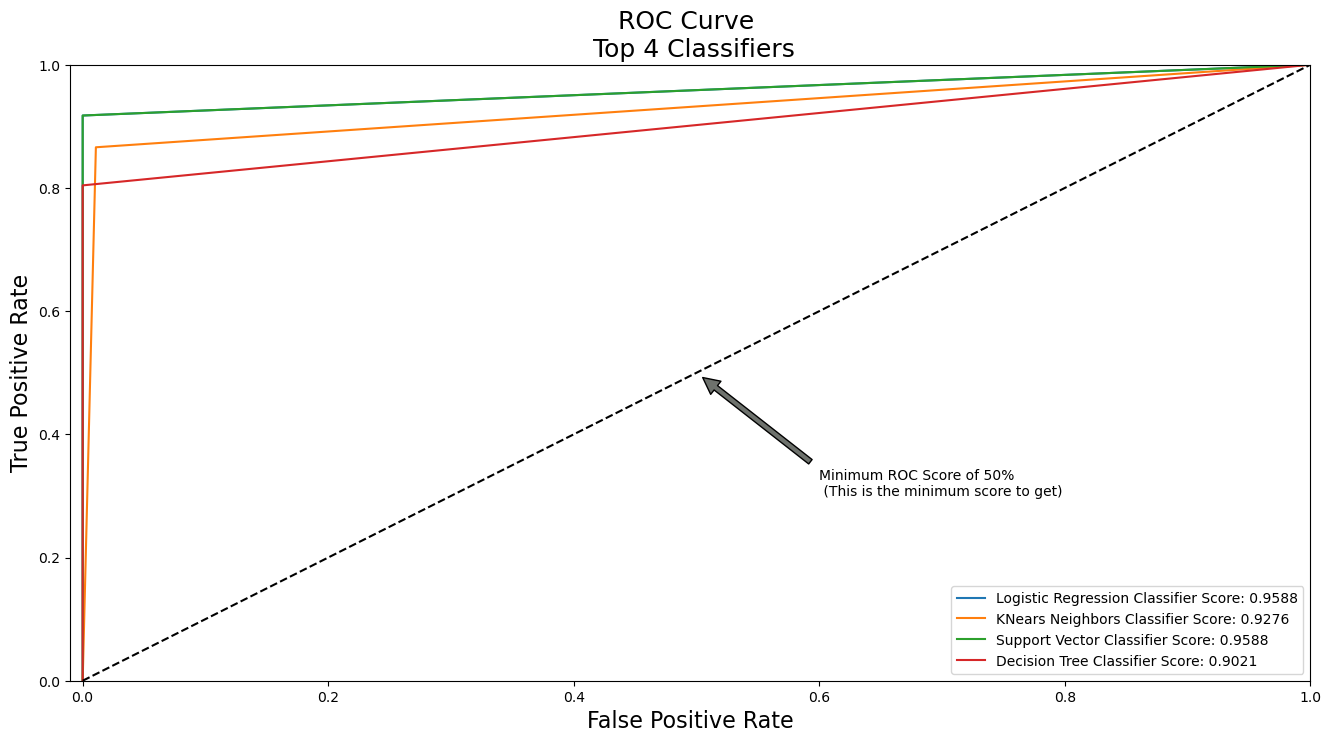

In [70]:
plt.figure(figsize=(16,8))
plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, log_reg_pred)))
plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knears_pred)))
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_pred)))
plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, tree_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()
plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

**SVC** has better ROC AUC Score and we can see that from the Curve as well, it is the best model till now.

### 6.4.3: Confusion Matrix
<a id="6.4.3"></a>
 ⬆️[Table Contents](#table_content)

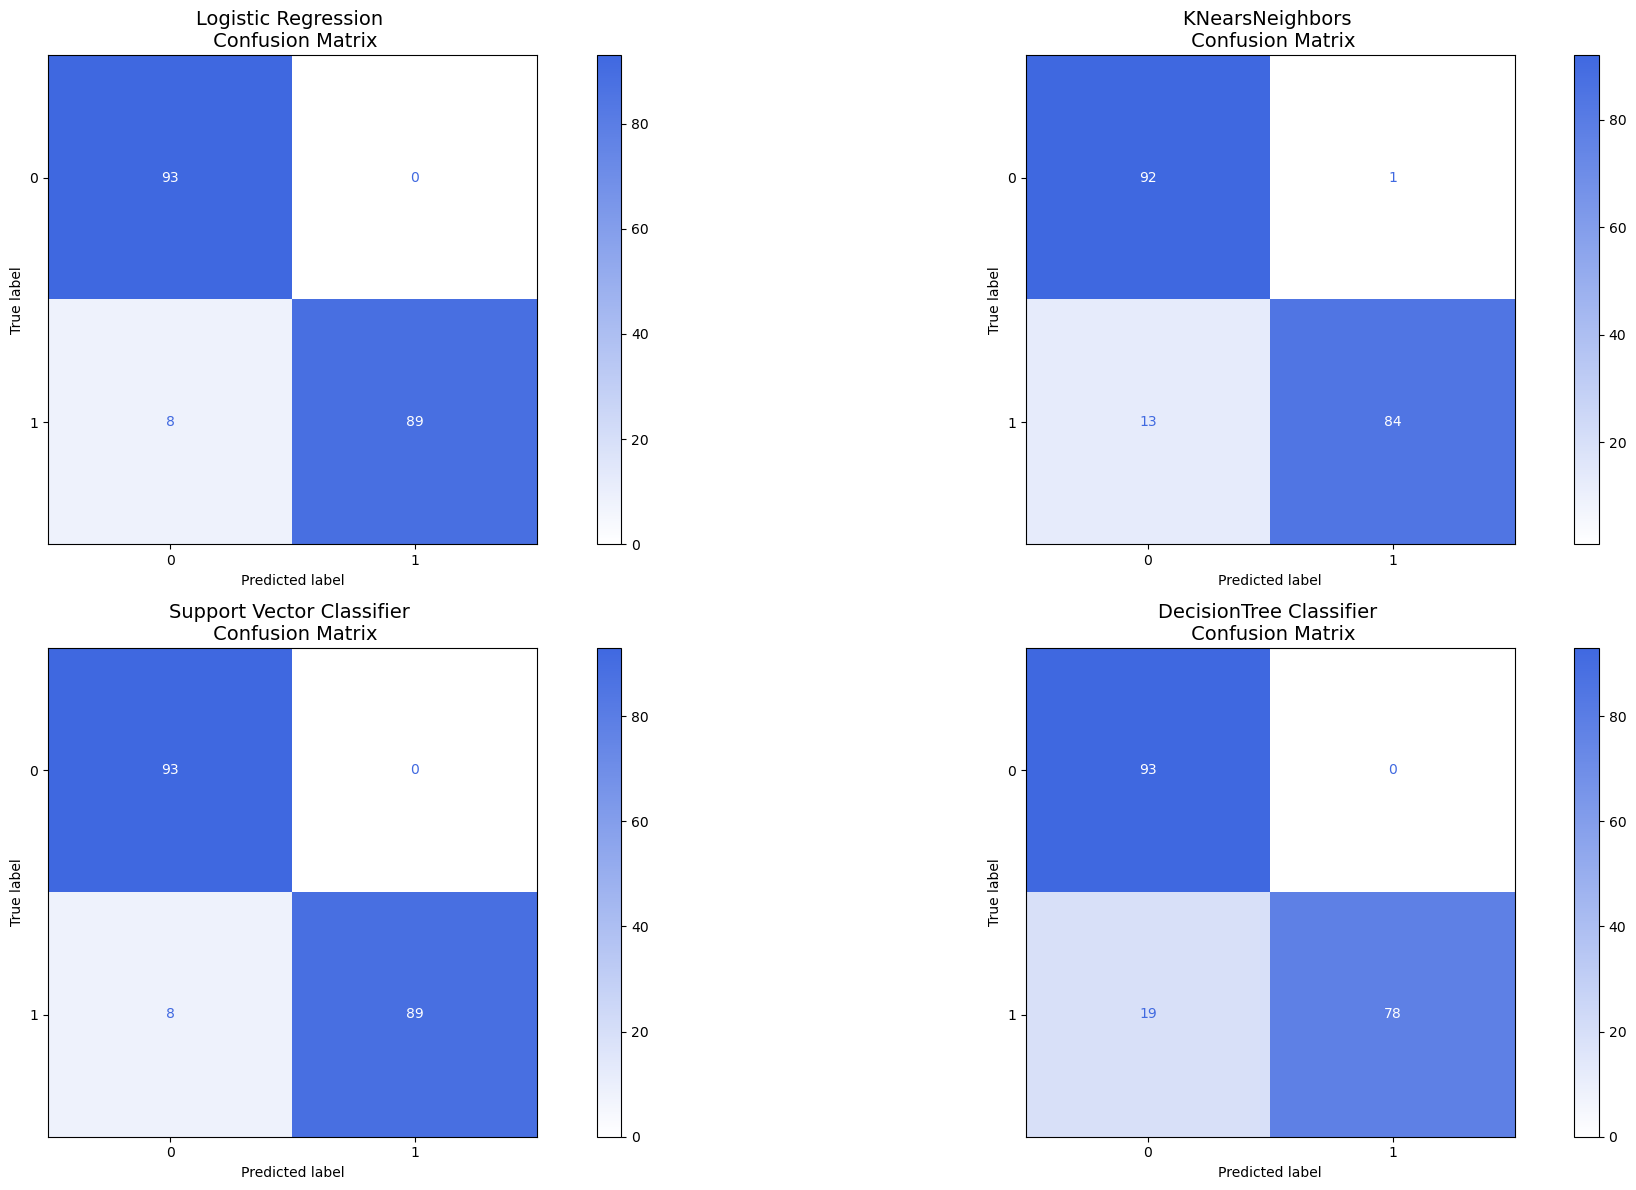

In [82]:
# Define royalblue colormap
royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1, 1, 1)), (1, (0.25, 0.41, 0.88))])

y_pred_log_reg = log_reg.predict(X_test)
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 12))

# Plot confusion matrices with royalblue colormap
disp1 = ConfusionMatrixDisplay(log_reg_cf, display_labels=log_reg.classes_)
disp1.plot(ax=ax1, cmap=royalblue)
ax1.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)

disp2 = ConfusionMatrixDisplay(kneighbors_cf, display_labels=log_reg.classes_)
disp2.plot(ax=ax2, cmap=royalblue)
ax2.set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)

disp3 = ConfusionMatrixDisplay(svc_cf, display_labels=log_reg.classes_)
disp3.plot(ax=ax3, cmap=royalblue)
ax3.set_title("Support Vector Classifier \n Confusion Matrix", fontsize=14)

disp4 = ConfusionMatrixDisplay(tree_cf, display_labels=log_reg.classes_)
disp4.plot(ax=ax4, cmap=royalblue)
ax4.set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)

plt.tight_layout()
plt.show()

As we can see from the image above values in the squares along horizontal axis are the true values of a class and cells along vertical axis contains predicted values

As from above discussion we now know what our values in the cofusion matrix above stand for so now we'll calculate precision and recall for each classes.

*  Precision = True Positive / (True Positive + False Positive)
*  Recall = True Positive / (True Positive + False Negative)
*  F1-Score = (2 * Precision * Recall) / (Precision + Recall)

It's evident that we need to look at recall to judege best performing model since we want to reduce False negatives for class 1(fraud).

### 6.4.4: Classification Report
<a id="6.4.4"></a>
 ⬆️[Table Contents](#table_content)

In [72]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        93
           1       1.00      0.92      0.96        97

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        93
           1       0.99      0.87      0.92        97

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        93
           1       1.00      0.92      0.96        97

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted

*  Here also we can see Logistic Regression outperfroms others.

# 7: Testing
<a id="7"></a>
 ⬆️[Table Contents](#table_content)

Now we'll test our models on original test data "***original_Xtest***".

First of all let's see confusion matrix for all our models.


* Taking predictions from logistic regression model, go ahead and complete the below cell to calculate these.
```
org_log_reg_pred = log_reg.predict(original_Xtest)
```


In [70]:
org_log_reg_pred = log_reg.predict(original_Xtest)

org_knears_pred = knears_neighbors.predict(original_Xtest)

org_svc_pred = svc.predict(original_Xtest)

org_tree_pred = tree_clf.predict(original_Xtest)

and now we see confusion matrix for the same, refer to the syntax below and complete the next cell.

* calculating confusion matrix for logistic regression.
```
org_log_reg_cf = confusion_matrix(original_ytest, org_log_reg_pred)
```



In [71]:
org_log_reg_cf = confusion_matrix(original_ytest, org_log_reg_pred)
org_kneighbors_cf = confusion_matrix(original_ytest, org_knears_pred)
org_svc_cf = confusion_matrix(original_ytest, org_svc_pred)
org_tree_cf = confusion_matrix(original_ytest,org_tree_pred)

print(org_log_reg_cf, '\n', org_kneighbors_cf, '\n', org_svc_cf, '\n', org_tree_cf )

[[54443  2418]
 [    9    89]] 
 [[56137   724]
 [   13    85]] 
 [[54915  1946]
 [    9    89]] 
 [[54909  1952]
 [   10    88]]


SVC has least False negatives as expected for fraud class.

let's have a look at the classification report of the models.

as we can see other models have comapreable or better numbers in F1 or precision but that is not the judging criteria for us our recall of fraud class is what concerns us the most and that we have best for SVC.

In [72]:
print('Logistic Regression:')
print(classification_report(original_ytest, org_log_reg_pred))

print('KNears Neighbors:')
print(classification_report(original_ytest, org_knears_pred))

print('Support Vector Classifier:')
print(classification_report(original_ytest, org_svc_pred))

print('Tree Classifier:')
print(classification_report(original_ytest, org_tree_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56861
           1       0.04      0.91      0.07        98

    accuracy                           0.96     56959
   macro avg       0.52      0.93      0.52     56959
weighted avg       1.00      0.96      0.98     56959

KNears Neighbors:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56861
           1       0.11      0.87      0.19        98

    accuracy                           0.99     56959
   macro avg       0.55      0.93      0.59     56959
weighted avg       1.00      0.99      0.99     56959

Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56861
           1       0.04      0.91      0.08        98

    accuracy                           0.97     56959
   macro avg       0.52      0.94      0.53     56959
weighted